In [1]:
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, CenterCrop
from USKCoffeeDataset import USKCoffeeDataset as DSET
from USKCoffeeDataset import USKCoffeeDatasetDefect as DSET_DEFECT

In [2]:
# define image transform
train_transform = Compose([
        # transforms.Resize((256, 256)), # image size is already 256x256
        CenterCrop((224, 224)),
        # transforms.RandomHorizontalFlip(), # FIXME: Disable augmentation
        # transforms.RandomVerticalFlip(),
        # transforms.RandomRotation(30),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
label = ['defect', 'longberry', 'peaberry', 'premium']

### Default dataset

In [3]:
# load dataset
dset = DSET(phase="train", transform=train_transform)

Labels: ['defect', 'longberry', 'peaberry', 'premium']


In [4]:
# rand index from 0 to len(dset)
rand_idx = torch.randint(0, len(dset), (1,)).item()
sample = dset[rand_idx]
print(sample[0].shape)

torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.2739873].


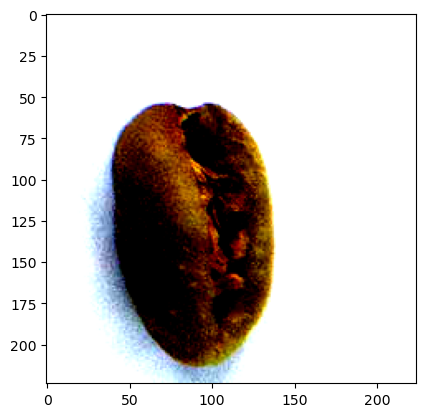

longberry


In [5]:
# show image, sample[0] a tensor with format (c, w, h) and sample[1] is label
import matplotlib.pyplot as plt
plt.imshow(sample[0].permute(1, 2, 0))
plt.show()
print(label[sample[1]])

### Defects version

In [6]:
dset_defect = DSET_DEFECT(phase="train", transform=train_transform)

In [29]:
# rand index from 0 to len(dset)
rand_idx = torch.randint(0, len(dset_defect), (1,)).item()
sample = dset_defect[rand_idx]
print(sample[0].shape)

torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8044444..2.64].


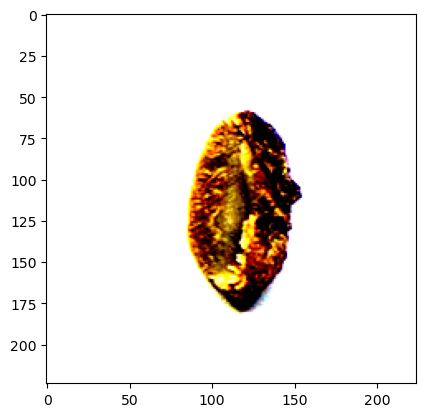

0


In [30]:
plt.imshow(sample[0].permute(1, 2, 0))
plt.show()
print(sample[1])

In [31]:
# count number of each class
num_defect = 0
num_non_defect = 0
for i in range(len(dset_defect)):
    if dset_defect[i][1] == 0:
        num_defect += 1
    else:
        num_non_defect += 1
print("Number of defect: ", num_defect)
print("Number of non-defect: ", num_non_defect)

Number of defect:  1200
Number of non-defect:  3600
